# Metropolis Hastings Algorithm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import scipy.stats as stats
import math

In [2]:
df = pd.read_csv('airconditioner.csv')
df

,Week,air conditioner: (Worldwide)
0,2015-01-04,12
1,2015-01-11,11
2,2015-01-18,11
3,2015-01-25,10
4,2015-02-01,9
...,...,...
256,2019-12-01,16
257,2019-12-08,16
258,2019-12-15,18
259,2019-12-22,16


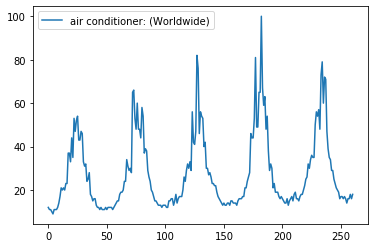

In [3]:
df = df.drop(['Week'], axis=1)
df.plot()

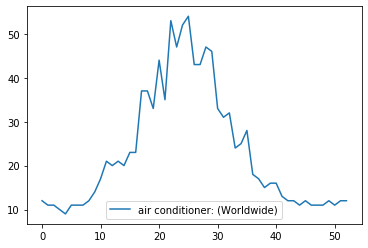

In [4]:
one_year = df.head(53)
one_year.plot()

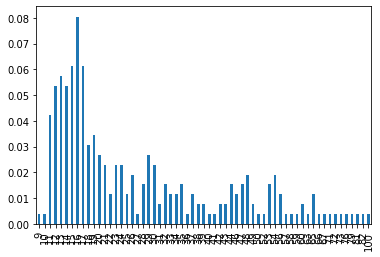

In [5]:
# gamma distribution
freq_all_years = df['air conditioner: (Worldwide)'].value_counts()
freq_all_years = freq_all_years.sort_index()
freq_all_years = freq_all_years/261
freq_all_years.plot(kind = 'bar')


In [26]:
#Markov chain part
def proposal_distribution(params): 
    return np.random.normal(params,[5,0.05],(2,))

def prior(params):
    # alpha and beta should be greater than zero
    if(params[0]<=0 or params[1] <=0):
        return 0
    else:
        return 1
    
def equation_log_likelihood_gamma(x,data):
    return np.sum((x[0]-1)*np.log(data) - (1/x[1])*data - x[0]*np.log(x[1]) - np.log(math.gamma(x[0])))
    
def log_likelihood_gamma(x,data):
    return np.sum(np.log(scipy.stats.gamma(a=x[0],scale=x[1],loc=0).pdf(data))) 


def transition_density_ratio(x,y):
    q = (1/math.sqrt(2 * math.pi)) * (0.5 * ((y - x)**2))
    q1 = (1/math.sqrt(2 * math.pi)) * (0.5 * ((x - y)**2))
    return (np.log(q) - np.log(q1))


#Defines whether to accept or reject the new sample
def accept(x, y):
    Q = transition_density_ratio(x.item(),y.item())
#     print('Acceptance:',x, x_new)
    if ((y.item() + Q)>x.item()):
        return True
    else:
        if ((np.exp(y.item() - x.item()+ Q)) > np.random.uniform(0,1)):
            return True
        else:
            return False

def metropolis_hastings(prior, params_init,iterations,data):
    params = params_init
    
    accepted = []
    
    for i in range(iterations):
        
        params_new =  proposal_distribution(params)    
        
        l_likelihood = equation_log_likelihood_gamma(params,data)
        
        new_l_likelihood = equation_log_likelihood_gamma(params_new,data) 
        
        print(accept(l_likelihood + np.log(prior(params)), new_l_likelihood + np.log(prior(params_new))))
        
        if (accept(l_likelihood + np.log(prior(params)), new_l_likelihood + np.log(prior(params_new)))):            
            
            accepted.append(params_new)
            
            params = params_new
            print("---",params)            
                
    return np.array(accepted)

In [27]:
data_initial = df.loc[np.random.randint(0, 250, 100)]
# data_initial = df
print(activity)

accepted = metropolis_hastings(prior,[4, 10], 500,data_initial)


     air conditioner: (Worldwide)
66                             24
119                            32
127                            82
4                               9
122                            29
..                            ...
73                             66
242                            29
212                            16
193                            23
196                            19

[100 rows x 1 columns]
False
False
True
--- [1.69672772 9.95873781]
False
False
True
--- [2.56940012 9.97101434]
False
False
False
False
False
False
False
False
False
False
False
False
True
--- [2.77530372 9.95368435]
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
--- [2.6771555  9.97131752]
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
--- [2.53273548 9.98795058]
False
False
False
True
--- [ 2.49869145 10.01574324]
False
False
F

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: divide by zero encountered in log
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
--- [ 2.93130576 10.02610378]
False
False
True
--- [2.40968491 9.99150311]
False
False
False
False
False
False
False
True
--- [2.66508602 9.96489198]
False
False
False
False
False
False
False
False
False
--- [2.70515774 9.9977831 ]
False
False
False
False
False
False
False
False
--- [2.81823636 9.96369593]
False
False
False
False
False
True
--- [2.77080484 9.99904944]
True
--- [2.73358859 9.97284399]
False
False
False
False
True
--- [2.68597571 9.9250642 ]
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
Fa

In [28]:
accepted

array([[ 1.69672772,  9.95873781],
       [ 2.56940012,  9.97101434],
       [ 2.77530372,  9.95368435],
       [ 2.6771555 ,  9.97131752],
       [ 2.53273548,  9.98795058],
       [ 2.49869145, 10.01574324],
       [ 2.96422984, 10.07158072],
       [ 2.93130576, 10.02610378],
       [ 2.40968491,  9.99150311],
       [ 2.66508602,  9.96489198],
       [ 2.70515774,  9.9977831 ],
       [ 2.81823636,  9.96369593],
       [ 2.77080484,  9.99904944],
       [ 2.73358859,  9.97284399],
       [ 2.68597571,  9.9250642 ],
       [ 2.77027182,  9.83102849],
       [ 2.81017957,  9.85206452],
       [ 2.55411513,  9.88841057],
       [ 2.53034767,  9.93375384],
       [ 2.70203137, 10.00091216],
       [ 2.53760406, 10.03346906],
       [ 2.82154198, 10.01460679]])

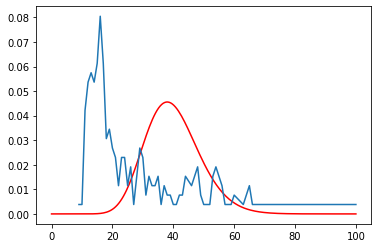

In [31]:
x = np.linspace (0, 100, 200) 
y1 = stats.gamma.pdf(x, a=accepted[-1][0], scale=accepted[-1][1])
# y1 = stats.gamma.pdf(x, a=20, scale=2)
plt.plot(x, y1,color = 'r')
plt.plot(freq_all_years)
plt.show()